Load Data

In [ ]:
import numpy as np

in_data = np.load("/Users/ryan.gorzek/Downloads/retr02_002_001_stackred_seg_n3processed.npy", allow_pickle=True)
data = in_data.item()

Plot Centroids for Pre-corrected Imaging Volume

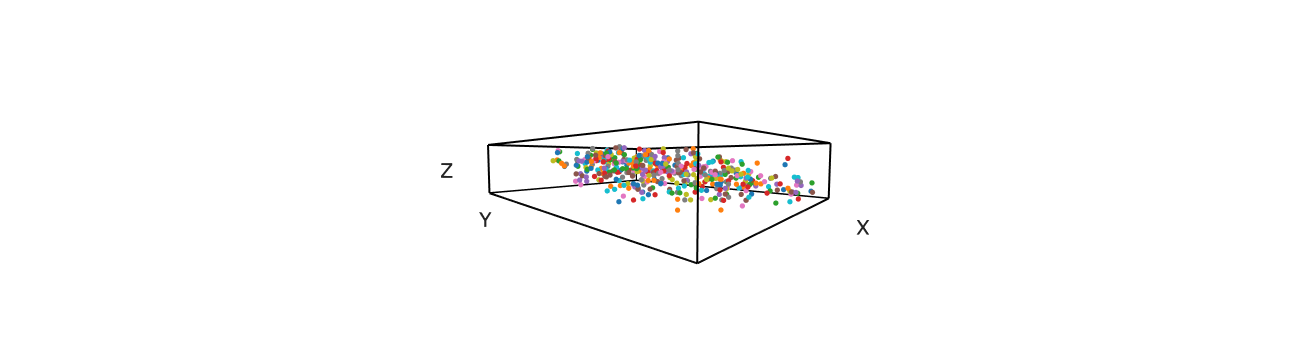

In [28]:
from skimage.measure import label, regionprops
import plotly.express as px
import plotly.io as pio
import pandas as pd

scale = 10

def draw_bbox(xlims, ylims, zlims):
    X = []
    Y = []
    Z = []
    for x in xlims:
        for y in ylims:
            for z in zlims:
                X.append(x)
                Y.append(y)
                Z.append(z)
    for x in xlims:
        for z in zlims:
            for y in ylims:
                X.append(x)
                Y.append(y)
                Z.append(z)
    for z in zlims:
        for y in ylims:
            for x in xlims:
                X.append(x)
                Y.append(y)
                Z.append(z)
    return X, Y, Z

regions = regionprops(data["masks"])

X, Y, Z = draw_bbox([0,795], [0,899], [0,65])
df = pd.DataFrame(dict(
    X=X, 
    Y=Y, 
    Z=Z,
    line_group=np.repeat(range(int(len(X)/2)), 2)
))
fig = px.line_3d(df, x='X', y='Y', z='Z', line_group='line_group', template="simple_white")
fig.update_traces(line_color="black", line_width=4)
for region in regions[::10]:
    z, y, x = region.centroid
    fig.add_scatter3d(x=[x], y=[y], z=[z])
camera = dict(eye=dict(x=12, y=12, z=0.85))
fig.update_layout(
    scene = dict(
        xaxis = dict(ticks="", range=[0, 795], showgrid=False, showticklabels=False, title_font_size=20),
        yaxis = dict(ticks="", range=[0, 899], showgrid=False, showticklabels=False, title_font_size=20),
        zaxis = dict(ticks="", range=[0, 65], showgrid=False, showticklabels=False, title_font_size=20),
        aspectmode="manual",
        aspectratio=dict(x=13.7, y=17, z=3.3),),
    width=900,
    showlegend=False,
    scene_camera=camera
                )
fig.update_traces(marker_size=3)
fig.show()
pio.write_image(fig, "/Users/ryan.gorzek/Downloads/test3d.jpeg", scale=3)

In [25]:
12/(16/1.2)

0.8999999999999999